In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import napari
from skimage import io
from skimage.util import crop
import networkx as nx

C:\App\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [8]:
image = io.imread("../data/rhizophagus/25/4/R25_14_07_P20.jpg")

In [9]:
img = image[:, :, 1]

In [10]:
G = pickle.load(open('../data/rhizophagus/25/4/R25_14_07_P20.pklclean', 'rb'))

In [11]:
pts = {n : G.nodes[n]["pts"] for n in G.nodes }
pts = {n : (y, -x) for n, (x, y) in pts.items()} 

In [12]:
points_G = np.array([G.nodes[n]['pts'] for n in G.nodes])

edges_G = []
for u, v in G.edges():
    pt_u = G.nodes[u]['pts']
    pt_v = G.nodes[v]['pts']
    edges_G.append([pt_u, pt_v])
edges_G = np.array(edges_G)

In [13]:
viewer = napari.Viewer()

viewer.add_image(img, name = "raw image")

viewer.add_points(points_G, name="nodes", size=10, face_color="blue", border_color="gray")
viewer.add_shapes(edges_G, shape_type="line", edge_color="white", edge_width=1, name="edges")

napari.run()

In [8]:
image = io.imread("../data/rhizophagus/12/4/R12_23_06_P11.jpg")

img = image[:, :, 1]

G = pickle.load(open('../data/rhizophagus/12/4/R12_23_06_P11.pklclean', 'rb'))

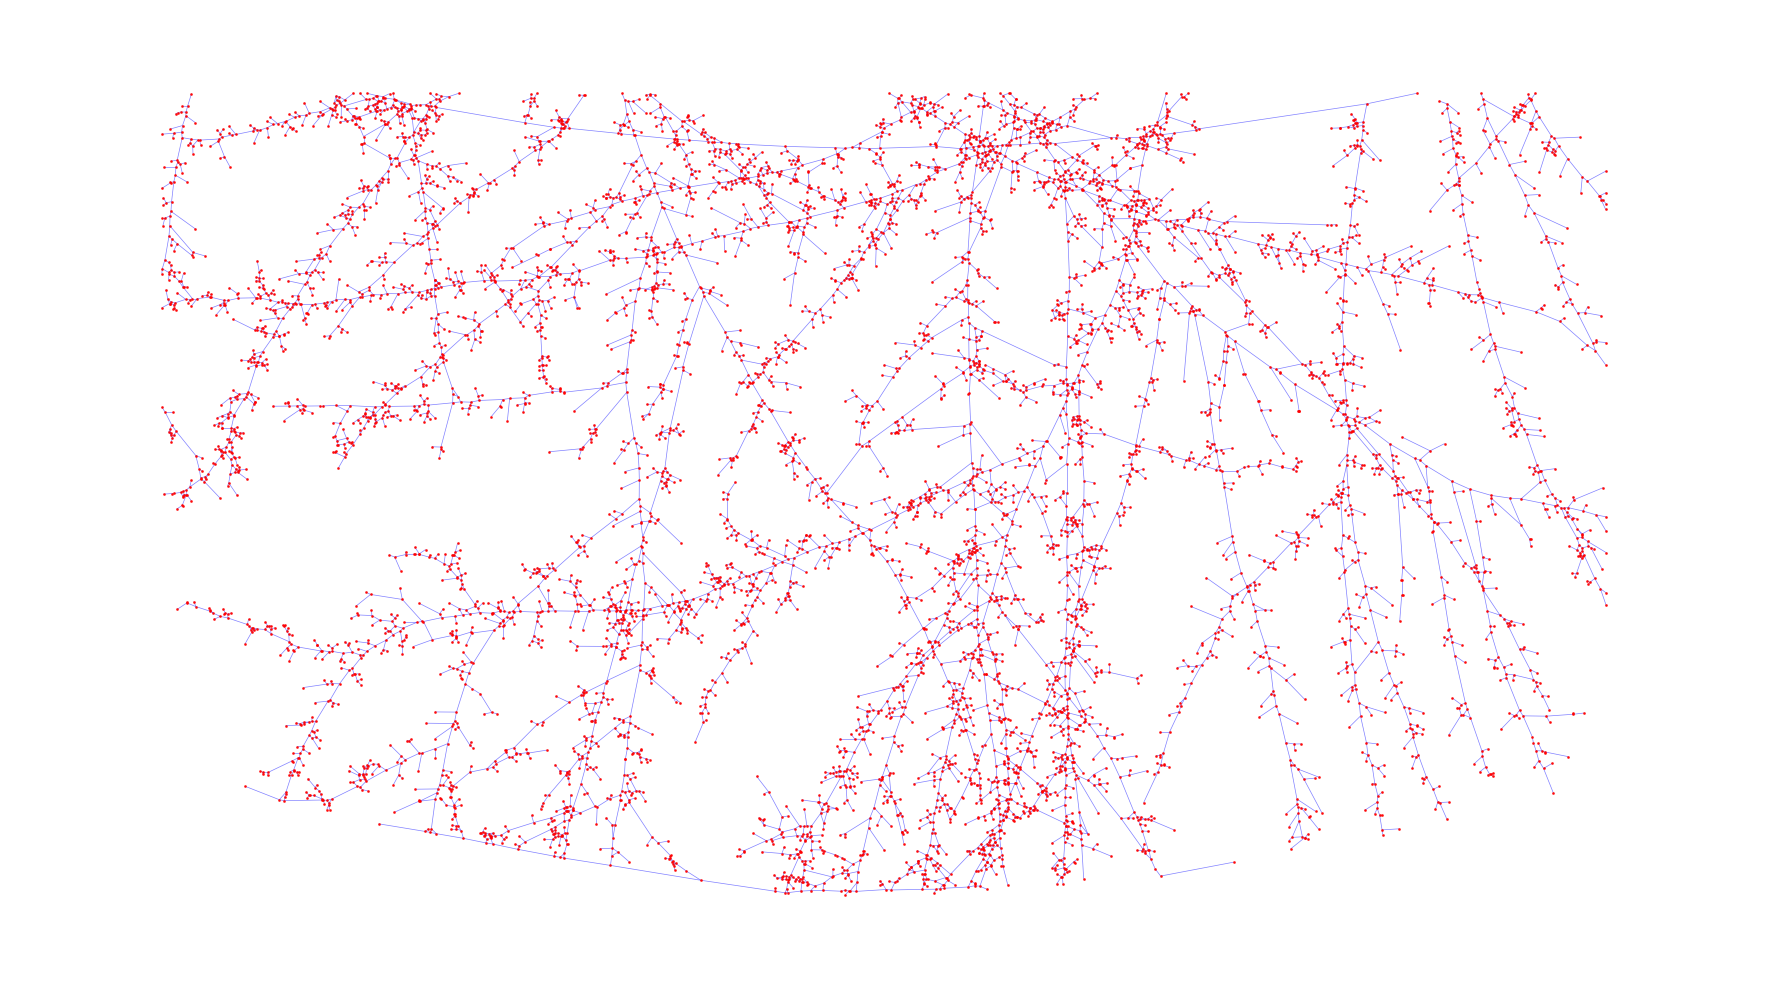

In [15]:
pts = {n: (G.nodes[n]['o'][1], G.nodes[n]['o'][0]) for n in G.nodes}  # (col, row) → (x, y)

fig, ax = plt.subplots(figsize=(17.78, 10))
# ax.imshow(img, cmap='gray')

nx.draw_networkx_edges(G, pts, ax=ax,
                       edge_color='blue',
                       alpha=0.5,         
                       width=0.5)         

nx.draw_networkx_nodes(G, pts, ax=ax,
                       node_color='red',
                       alpha=0.8,         
                       node_size=1)

plt.axis('off')
plt.tight_layout()
plt.savefig("graphe_R12_23_06_P11", dpi=300)
plt.show()

# Gigaspora : réseaux dans Napari

In [2]:
import os
import tqdm

In [5]:
viewer = napari.Viewer()

for mesure in os.listdir("C:/Users/Renée/Documents/Memoire/Masters_thesis/data/gigaspora/34") :
    if mesure > "2" : 
        continue
    for photo in os.listdir(os.path.join("C:/Users/Renée/Documents/Memoire/Masters_thesis/data/gigaspora/34", mesure)):
        if photo.endswith(".JPG"):
            path = os.path.join("C:/Users/Renée/Documents/Memoire/Masters_thesis/data/gigaspora/34", mesure, photo)

            image = io.imread(path)
            img = image[:, :, 1]

            viewer.add_image(img, name=photo)

            print(f"Affichage de : {path}")

        if photo.endswith(".pklclean") : 
            path = os.path.join("C:/Users/Renée/Documents/Memoire/Masters_thesis/data/gigaspora/34", mesure, photo)
            G = pickle.load(open(path, 'rb'))
        
            points_G = np.array([G.nodes[n]['pts'] for n in G.nodes])

            edges_G = []
            for u, v in G.edges():
                pt_u = G.nodes[u]['pts']
                pt_v = G.nodes[v]['pts']
                edges_G.append([pt_u, pt_v])
            edges_G = np.array(edges_G)

            viewer.add_points(points_G, name=photo, size=10, face_color="blue", border_color="gray")
            viewer.add_shapes(edges_G, shape_type="line", edge_color="white", edge_width=1, name=photo)

            print(f"Affichage de : {path}")

napari.run()

Affichage de : C:/Users/Renée/Documents/Memoire/Masters_thesis/data/gigaspora/34\1\G09_10_06_P01.JPG
Affichage de : C:/Users/Renée/Documents/Memoire/Masters_thesis/data/gigaspora/34\1\G09_10_06_P01.pklclean
Affichage de : C:/Users/Renée/Documents/Memoire/Masters_thesis/data/gigaspora/34\1\G09_10_06_P02.JPG
Affichage de : C:/Users/Renée/Documents/Memoire/Masters_thesis/data/gigaspora/34\1\G09_10_06_P02.pklclean
Affichage de : C:/Users/Renée/Documents/Memoire/Masters_thesis/data/gigaspora/34\1\G09_10_06_P03.JPG
Affichage de : C:/Users/Renée/Documents/Memoire/Masters_thesis/data/gigaspora/34\1\G09_10_06_P03.pklclean
Affichage de : C:/Users/Renée/Documents/Memoire/Masters_thesis/data/gigaspora/34\2\G09_16_06_P01.JPG
Affichage de : C:/Users/Renée/Documents/Memoire/Masters_thesis/data/gigaspora/34\2\G09_16_06_P01.pklclean
Affichage de : C:/Users/Renée/Documents/Memoire/Masters_thesis/data/gigaspora/34\2\G09_16_06_P02.JPG
Affichage de : C:/Users/Renée/Documents/Memoire/Masters_thesis/data/gig